## Данные

В этой лабораторной работе будем работать с [датасетом](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset), предназначенным для обучения алгоритма рекомендаций книг.

Для рекомендаций нам понадобятся таблицы `Books.csv` и `Ratings.scv`. Файл с рейтингами можно найти в папке с лабораторной работой на гитхабе. Файл с описаниями книг слишком большой, поэтому он располагается только по ссылке:
1. Файл с рейтингами (такой же, как в гитхабе): https://drive.google.com/file/d/1Hliaee7Y584-7lMoGeGjGabRRubzdoYn/view?usp=sharing
2. Файл с книгами:  https://drive.google.com/file/d/1JYpk5GTzK7GWT3mtDb9fNiwaVTzk8BBy/view?usp=sharing

In [1]:
import pandas as pd

In [2]:
!gdown 1Hliaee7Y584-7lMoGeGjGabRRubzdoYn
!gdown 1JYpk5GTzK7GWT3mtDb9fNiwaVTzk8BBy

Downloading...
From: https://drive.google.com/uc?id=1Hliaee7Y584-7lMoGeGjGabRRubzdoYn
To: /content/Ratings.csv
100% 22.6M/22.6M [00:00<00:00, 46.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JYpk5GTzK7GWT3mtDb9fNiwaVTzk8BBy
To: /content/Books.csv
100% 73.3M/73.3M [00:00<00:00, 76.2MB/s]


Посмотрим на таблицу `Ratings`.

In [3]:
ratings = pd.read_csv("Ratings.csv")
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [4]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [5]:
ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
User-ID,1149780.0,140386.395126,80562.277718,2.0,70345.0,141010.0,211028.0,278854.0
Book-Rating,1149780.0,2.866950,3.854184,0.0,0.0,0.0,7.0,10.0


Как распределяются рейтинги?

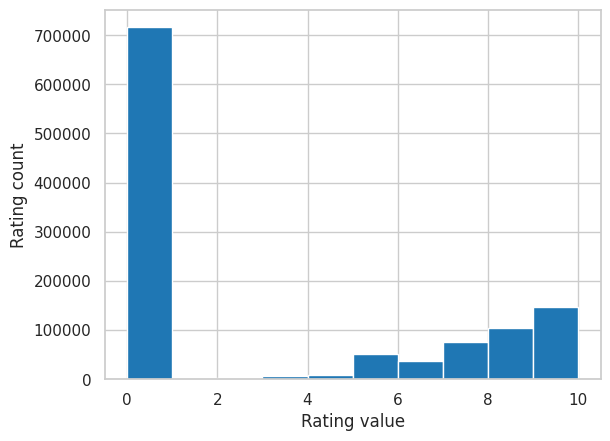

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("notebook")
sns.set_style("whitegrid")

ratings["Book-Rating"].hist()
plt.xlabel("Rating value")
plt.ylabel("Rating count")
plt.show()


Теперь посмотрим на таблицу `Books`.

In [7]:
books = pd.read_csv("Books.csv")
books.head()

<ipython-input-7-7dc4eb500039>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("Books.csv")


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [8]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


- Есть немножко пропусков.
- Проверим уязвимую часть данных – года – на адекватность.

In [9]:
books["Year-Of-Publication"].value_counts().sort_values(ascending=True)[:10]

,count
Year-Of-Publication,
2037,1
2011,1
2038,1
1938,1
1906,1
1919,1
1926,1
1926,1
2008,1


Есть года, которые еще не наступили...

Проверим, есть ли строковые данные в столбце с годом (потому что `info()` назвал тип данных столбца `object`).

In [10]:
books[books["Year-Of-Publication"].map(str).str.match("[^0-9]")]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


В трех строках пропущен автор, из-за чего смещены данные. Автор либо пропущен, либо склеен с названием. Надо проверить.

В сводке написано, что часть авторов и издателей провущена. Проверим, так ли это.

In [11]:
books[(books["Book-Author"].isnull()) | (books["Publisher"].isnull())]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


Да, это так. Основные проблемы с данными выявили. Пора их исправлять и приступать к созданию рекомендаций.

## План анализа данных

1. Обработать данные, т.к. в данных есть несколько небольших проблем:
  1. В паре строк в таблице `Books.scv` значения столбцов сдвинуты вправо, а еще есть года, которые еще не наступили.
  2. В нескольких строках в таблице `Books.scv` есть пропуски, а также для рекомендаций в рамках лабораторной не понадобятся ссылки на картинки с обложкой.
  3. Не будем использовать для обучения записи с рейтинг равным 0 из таблицы `Ratings.scv`. Считаем, что 0 означает, что пользователь еще не оценивал книгу, но проявил к ней какой-то интерес.
  4. Не будем использовать для обучения алгоритмов те книги, которым оценка поставлена всего 1 раз. Пользователей, оценивших всего одну книгу тоже брать в расчет не будем (хотя это на самом деле будет не сильно сказываться на обобщающей способности алгоритмов, можете сами проверить).
  5. Пункты 1-4 необходимы и достаточны для выполнения всех задач. Но можно сделать более глубокую обработку.
2. Обучить [SVD](https://surprise.readthedocs.io/en/stable/getting_started.html) на следующих записях: у книги есть хотя бы одна оценка, пользователь оценил хотя бы одну книгу.
   - МАЕ должно быть ниже 1.3 (для этого есть тест)
   - **Сохранить модель.**
3. Научить линейную регрессию ([SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)) предсказывать средний рейтинг книги по следующим столбцам: автор, издатель, год издания, векторизованное название (для векторизации можно использовать [tf-idf](https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting), [word2vec](https://radimrehurek.com/gensim/models/word2vec.html) или более сложный алгоритм. Для достижения требуемой тестом точности достаточно будет tf-idf. Собрав полностью датасет, не забудьте нормализовать данные ([StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)).
   - МАЕ должно быть ниже 1.5 (для этого есть тест)
   - **Сохранить модель.**
4. В файле `personal_recommendation.py` создайте рекомендацию для пользователя, у которого в исходном датасете было больше всего 0 среди рейтингов книг.
   Алгоритм такой:
   1. Находим нужного пользователя.
   2. Делаем предсказание SVD для книг, которым он "поставил" 0.
   3. Берем те книги, для которых предсказали рейтинг не ниже 8. Считаем, что 8 означет, что книга ему точно понравится.
   4. Делаем предсказание LinReg для этих же книг.
   5. Сортируем полученный на шаге 3 список по убыванию рейтинга линейной модели.
   6. В конце файла комментарием записываем полученную рекомендацию.

- То есть идея в том, чтобы сделать для пользователя индивидуальную рекомендацию, показывая в начале списка те книги, которые в целом могли бы иметь высокий рейтинг.
- Обязательно сохраняйте готовую модель и добавляйте ее в свой репозиторий, потому что файл с сохраненной моделью используется в тестах.

**Задание 1**


Пункт 1

In [12]:
!pip install scikit-surprise joblib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357281 sha256=109710e905e6ccc6dc703c621d26ebaf4c6967a3a3e53c45ed9b6bf34211ad26
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [13]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.metrics import mean_absolute_error
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
from scipy.sparse import csr_matrix

In [14]:
books = pd.read_csv('Books.csv')

# Преобразуем столбец Year-Of-Publication в числовой формат
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')

# Сортировка столбца Year-Of-Publication от самого нового к самому старому
sorted_books = books.sort_values(by='Year-Of-Publication', ascending=False)

print("Первые 5 строк столбца Year-Of-Publication (от самого нового к самому старому):")
print(sorted_books['Year-Of-Publication'].head(5))

<ipython-input-14-b24ac548f30b>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books.csv')


Первые 5 строк столбца Year-Of-Publication (от самого нового к самому старому):
97826     2050.0
80264     2050.0
116053    2038.0
255409    2037.0
228173    2030.0
Name: Year-Of-Publication, dtype: float64


In [15]:
books = books[books['Year-Of-Publication'] <= 2024]

Пункт 2


In [16]:
# Проверка на наличие пропусков
print("Пропуски в данных до обработки:")
print(books.isnull().sum())

Пропуски в данных до обработки:
ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64


In [17]:
books = books.dropna()

# Удаление столбцов с URL изображений
books = books.drop(columns=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'])

print("Пропуски в данных после обработки:")
print(books.isnull().sum())

Пропуски в данных после обработки:
ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64


Пункт 3

In [18]:
ratings = pd.read_csv('Ratings.csv')

# Фильтрация для удаления записей с рейтингом 0
filtered_ratings = ratings[ratings['Book-Rating'] > 4]

Пункт 4


In [19]:
book_counts = filtered_ratings['ISBN'].value_counts()

# Количество оценок для каждого пользователя
user_counts = filtered_ratings['User-ID'].value_counts()

books_to_keep = book_counts[book_counts > 1].index  # книги с более чем одной оценкой
users_to_keep = user_counts[user_counts > 1].index  # пользователи с более чем одной оценкой

filtered_ratings = ratings[
    (ratings['ISBN'].isin(books_to_keep)) &
    (ratings['User-ID'].isin(users_to_keep))
]

**Задание 2**

In [20]:
from surprise import SVDpp
import pickle
from sklearn.preprocessing import MinMaxScaler
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from surprise import SVD
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate

In [23]:
td = pd.read_csv("svd_test.csv")
# Проверка наличия нужных столбцов
required_columns = {'User-ID', 'ISBN', 'Book-Rating'}
if not required_columns.issubset(ratings.columns):
    raise ValueError(f"DataFrame должен содержать столбцы: {required_columns}")

ratings = ratings[ratings['Book-Rating'] > 4]

book_counts = ratings['ISBN'].value_counts()

# Количество оценок для каждого пользователя
user_counts = ratings['User-ID'].value_counts()

books_to_keep = book_counts[book_counts > 6].index  # книги с более чем одной оценкой
users_to_keep = user_counts[user_counts > 6].index  # пользователи с более чем одной оценкой

ratings = ratings[(ratings['ISBN'].isin(books_to_keep)) & (ratings['User-ID'].isin(users_to_keep))]

reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(ratings[['User-ID', 'ISBN', 'Book-Rating']], reader)

test_data = pd.read_csv("svd_test.csv")
test_data['Book-Rating'] = test_data['Book-Rating'].astype(int)
testset = list(zip(test_data['User-ID'], test_data['ISBN'], test_data['Book-Rating']))
trainset = data.build_full_trainset()

svd = SVD(n_factors=50, reg_all=0.05, lr_all=0.005, n_epochs=30)
svd.fit(trainset)

MAE:  1.3825
1.382469826092667
Mean Absolute Error (MAE) на тестовой выборке: 1.382469826092667


In [24]:
# Сохранение модели
with open("svd.pkl", "wb") as file:
    pickle.dump(svd, file)

In [25]:
with open('svd.pkl', 'rb') as f:
    loaded_svd = pickle.load(f)
td = pd.read_csv("svd_test.csv")
# td_sorted = td.sort_values(by="User-ID", ascending=True)

In [26]:
predictions = loaded_svd.test(td.values)
mae = accuracy.mae(predictions)
print(mae)

MAE:  1.3825
1.382469826092667


**Задание 3**

In [27]:
books = pd.read_csv('Books.csv')
ratings = pd.read_csv('Ratings.csv')

# Объединение таблиц по ISBN
merged_data = pd.merge(books, filtered_ratings, on='ISBN', how='left')

merged_data = merged_data[merged_data['Book-Rating'] != 0]

# Оставляем только нужные столбцы
columns_to_use = ['User-ID', 'ISBN', 'Book-Author', 'Publisher', 'Year-Of-Publication', 'Book-Title', 'Book-Rating']
merged_data = merged_data[columns_to_use]

merged_data = merged_data.dropna()

<ipython-input-27-12099a7e24ad>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books.csv')


In [28]:
!pip install rs-metrics

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
merged_data['Year-Of-Publication'] = pd.to_numeric(merged_data['Year-Of-Publication'], errors='coerce')

tfidf_vectorizer = TfidfVectorizer(max_features=2000, min_df=10)
book_titles_tfidf = tfidf_vectorizer.fit_transform(merged_data['Book-Title'])

joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
author_publisher_encoded = one_hot_encoder.fit_transform(merged_data[['Book-Author', 'Publisher']])

joblib.dump(one_hot_encoder, 'one_hot_encoder.pkl')

# Нормализация года публикации
scaler = StandardScaler()
year_of_publication_scaled = scaler.fit_transform(merged_data[['Year-Of-Publication']].values.reshape(-1, 1))

joblib.dump(scaler, 'scaler.pkl')

X = hstack([book_titles_tfidf, author_publisher_encoded, csr_matrix(year_of_publication_scaled)])

y = merged_data['Book-Rating'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sgd_regressor = SGDRegressor(loss='squared_error', penalty='l2', max_iter=1000, tol=1e-3)
sgd_regressor.fit(X_train, y_train)

joblib.dump(sgd_regressor, 'sgd_regressor.pkl')

# Предсказание на тестовом наборе
y_pred = sgd_regressor.predict(X_test)

# Вычисление средней абсолютной ошибки (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae:.4f}')

MAE: 1.3908


**Задание 4**

In [31]:
data = pd.merge(ratings, books, on='ISBN', how='inner')

svd = joblib.load('svd.pkl')
linreg = joblib.load('sgd_regressor.pkl')
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')
scaler = joblib.load('scaler.pkl')

def generate_personal_recommendations(svd, linreg, tfidf_vectorizer, scaler, data, books):
    user_zero_ratings = data[data['Book-Rating'] == 0]['User-ID'].value_counts()
    user_with_most_zeros = user_zero_ratings.idxmax()

    target_user_ratings = data[data['User-ID'] == user_with_most_zeros]
    unrated_isbns = set(books['ISBN']) - set(target_user_ratings['ISBN'])

    predictions_svd = []
    for isbn in unrated_isbns:
        try:
            prediction = svd.predict(user_with_most_zeros, isbn)
            predictions_svd.append((isbn, prediction.est))
        except:
            continue  # Игнорируем ошибки предсказания

    # Отбор книг с прогнозируемым рейтингом не ниже 8
    recommended_books_svd = [(isbn, est) for isbn, est in predictions_svd if est >= 8]

    if not recommended_books_svd:
        print(f"Для пользователя {user_with_most_zeros} нет книг с SVD рейтингом >= 8.")
        return []

    recommendations_linreg = []
    for isbn, svd_rating in recommended_books_svd:
        book_row = books[books['ISBN'] == isbn]
        if book_row.empty:
            continue

        # Извлекаем признаки книги
        title_tfidf = tfidf_vectorizer.transform(book_row['Book-Title'].values.astype(str))
        year_scaled = scaler.transform(book_row[['Year-Of-Publication']].values.astype(float))
        author_publisher_encoded = one_hot_encoder.transform(book_row[['Book-Author', 'Publisher']])

        # Объединяем признаки
        features = hstack([title_tfidf, author_publisher_encoded, csr_matrix(year_scaled)])

        # Предсказание линейной модели
        predicted_rating = linreg.predict(features)[0]
        recommendations_linreg.append((isbn, predicted_rating))

    sorted_recommendations = sorted(recommendations_linreg, key=lambda x: x[1], reverse=True)

    recommendation_text = f'# Рекомендации для пользователя {user_with_most_zeros}:\n'
    for isbn, rating in sorted_recommendations:
        recommendation_text += f'# ISBN: {isbn}, Предсказанный рейтинг: {rating:.2f}\n'

generate_personal_recommendations(svd, linreg, tfidf_vectorizer, scaler, data, books)

Рекомендации для пользователя 198711 сохранены в 'personal_recommendation.py'.


[('0836221362', 9.551857617382709),
 ('0836213122', 9.54222562914778),
 ('1931514925', 9.498734581978331),
 ('0836217691', 9.497399680176198),
 ('0836217357', 9.442075133863423),
 ('8445071777', 9.392810406214895),
 ('0836218051', 9.383953622191061),
 ('0394800168', 9.373242932325653),
 ('0060256672', 9.358559812201875),
 ('0394800028', 9.34946124625434),
 ('0836218787', 9.325549043805045),
 ('8445071408', 9.29182132963405),
 ('0836218256', 9.267812545835241),
 ('0394839129', 9.244979254311172),
 ('1563891336', 9.230962744732501),
 ('0836204387', 9.221984188268129),
 ('0836218523', 9.214820797160638),
 ('0836218620', 9.20105252090545),
 ('156389016X', 9.196822947144932),
 ('0394800389', 9.188496772633279),
 ('0618002243', 9.186121647077915),
 ('0836218981', 9.169525450682706),
 ('1563891050', 9.162974432743837),
 ('055321313X', 9.144076369238553),
 ('1563890895', 9.14357334873122),
 ('0836218221', 9.143158364918678),
 ('0618002235', 9.138750609031211),
 ('0618129081', 9.13841116229324)

## Куда сдавать?

По инструкции в гитхаб – https://shy-question-39d.notion.site/1150ea832e418032bfc3d3e827c380fb?pvs=74

- К этой работе есть два теста – на качество получившихся моделей.
- Пул-реквест нужно сделать в ветку `lab2`.
- Можно загрузить в гитхаб файлы с реализацией по шаблону (шаблон можно дополнять и изменять под себя) или подготовить колаб с решением. Главное – сохранить модели, тесты проверяют их.

> Будьте внимательны! На гитхабе в ветке `main` обновился файл `pyad.yml`.

**Устная защита работ не требуется, но вам могут быть заданы вопросы прямо в вашем пул-реквесте!**